# 【問題1】クロスバリデーション
<br>
事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行.

In [1]:
# 事前学習で作成したベースライン
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/Users/suzukiyuuta/Downloads/application_train.csv')#教師データを読み込む
df = df.loc[:,["TARGET","AMT_INCOME_TOTAL","CNT_CHILDREN"]]




In [7]:
df_data_set = df.drop("TARGET", axis=1)
df_data_set = df_data_set.values

df_target_set = df["TARGET"]
df_target_set = df_target_set.values

from sklearn.model_selection import StratifiedKFold, cross_val_score
# 利用するモデルの定義
model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=10,
                      shuffle=True,
                      random_state=0)

scores = cross_val_score(model, df_data_set, df_target_set,cv=skf, n_jobs = -1)

print(scores)
print(scores.mean())


[0.91896462 0.91896462 0.91876951 0.91876951 0.91876951 0.91909206
 0.91892683 0.91882927 0.91886179 0.91876423]
0.9188711949020865


# 【問題2】グリッドサーチ

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_depth": [5, 8, 15, 30]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=skf)

X_train, X_test, y_train, y_test = train_test_split(df_data_set, df_target_set, random_state=0)

grid_search.fit(X_train, y_train)
 
print("Test set score:{:.2f}".format(grid_search.score(X_test, y_test)))

display(display(pd.DataFrame(grid_search.cv_results_)))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

Test set score:0.92


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.671846,0.027321,0.014680,0.000662,5,{'max_depth': 5},0.918748,0.918748,0.918748,0.918748,0.918788,0.918788,0.918788,0.918788,0.918788,0.918784,0.918771,0.000019,1
1,1.085808,0.172897,0.020045,0.002557,8,{'max_depth': 8},0.918748,0.918748,0.918748,0.918748,0.918788,0.918788,0.918788,0.918788,0.918788,0.918784,0.918771,0.000019,1
2,1.761584,0.813924,0.027262,0.001529,15,{'max_depth': 15},0.918488,0.918401,0.918488,0.918271,0.918267,0.918744,0.918528,0.918528,0.918484,0.918351,0.918455,0.000134,3
3,1.577175,0.282307,0.031097,0.003751,30,{'max_depth': 30},0.918574,0.918228,0.918401,0.918097,0.918224,0.918137,0.918484,0.918571,0.918224,0.918090,0.918303,0.000179,4


None

# 【問題3】Kernelからの調査
<br>
KaggleのKernelから様々なアイデアを見つけ出して、列挙してください

・LightGBMによる計算を行なってみる
<br>
・ピアソン相関係数の高い変数の削除（閾値を設ける（例えば０.９））
<br>
・欠損値の割合が７５％を超える場合は列ごと削除
<br>
・決定木分析による重要度分析で重要度が０に近いデータを削除
<br>
・特徴量削減の手法としてPCA：主成分分析、ICA：独立成分分析、多様体学習：非線形次元削減という手法もある。（注意点事項あり）

# 【問題4】高い汎化性能のモデル作成
<br>
lightGBMの導入、ハイパーパラメータ調整、etc

[5]	valid_0's multi_logloss: 0.278607
[10]	valid_0's multi_logloss: 0.278469
[15]	valid_0's multi_logloss: 0.278458
[20]	valid_0's multi_logloss: 0.278454
[25]	valid_0's multi_logloss: 0.278485
[30]	valid_0's multi_logloss: 0.278512
[35]	valid_0's multi_logloss: 0.278542
[40]	valid_0's multi_logloss: 0.278573
[45]	valid_0's multi_logloss: 0.278612
[50]	valid_0's multi_logloss: 0.27865
[55]	valid_0's multi_logloss: 0.278701
[60]	valid_0's multi_logloss: 0.27874
[65]	valid_0's multi_logloss: 0.278788
[70]	valid_0's multi_logloss: 0.278821
[75]	valid_0's multi_logloss: 0.278854
[80]	valid_0's multi_logloss: 0.278909
[85]	valid_0's multi_logloss: 0.278942
[90]	valid_0's multi_logloss: 0.278978
[95]	valid_0's multi_logloss: 0.279008
[100]	valid_0's multi_logloss: 0.279049
[[9.16706456e-01 8.32935437e-02 1.01317043e-15 ... 1.01317043e-15
  1.01317043e-15 1.01317043e-15]
 [9.17066912e-01 8.29330879e-02 1.01117453e-15 ... 1.01117453e-15
  1.01117453e-15 1.01117453e-15]
 [9.15778223e-01 8.42217

([array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
         8.000e+00, 1.900e+01, 4.079e+03, 7.277e+04]),
  array([7.277e+04, 4.079e+03, 1.900e+01, 8.000e+00, 0.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,

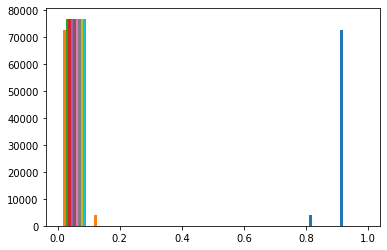

In [45]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data_set, df_target_set)

#　モデルの改善（LGBMClassifier）

train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 10,
    'verbose': 2,
}

gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    verbose_eval=5,
)

preds = gbm.predict(X_test)
y_pred = []
 
for x in preds:
    y_pred.append(np.argmax(x))

print(preds)
print(roc_auc_score(y_test, y_pred))

plt.hist(preds)

In [32]:
# 特徴量の改善

df_1 = pd.read_csv('/Users/suzukiyuuta/Downloads/application_train.csv')#教師データを読み込む
df_1 = df_1.loc[:,["TARGET","EXT_SOURCE_1","EXT_SOURCE_3",\
                  "EXT_SOURCE_2","DAYS_EMPLOYED","AMT_CREDIT",\
                  "DAYS_BIRTH","AMT_ANNUITY","AMT_GOODS_PRICE",\
                  "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CAHANGE",\
                  "DAYS_REGISTRATION","OWN_CAR_AGE","REGION_POPULATION_RELATIVE"]]

df_data_set_1 = df_1.drop("TARGET", axis=1)
df_data_set_1 = df_data_set_1.values

df_target_set_1 = df_1["TARGET"]
df_target_set_1 = df_target_set_1.values

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


[5]	valid_0's multi_logloss: 0.263919
[10]	valid_0's multi_logloss: 0.257737
[15]	valid_0's multi_logloss: 0.254562
[20]	valid_0's multi_logloss: 0.252499
[25]	valid_0's multi_logloss: 0.25115
[30]	valid_0's multi_logloss: 0.250208
[35]	valid_0's multi_logloss: 0.249631
[40]	valid_0's multi_logloss: 0.249259
[45]	valid_0's multi_logloss: 0.248972
[50]	valid_0's multi_logloss: 0.248758
[55]	valid_0's multi_logloss: 0.248594
[60]	valid_0's multi_logloss: 0.248537
[65]	valid_0's multi_logloss: 0.248553
[70]	valid_0's multi_logloss: 0.248522
[75]	valid_0's multi_logloss: 0.248556
[80]	valid_0's multi_logloss: 0.248564
[85]	valid_0's multi_logloss: 0.248595
[90]	valid_0's multi_logloss: 0.248618
[95]	valid_0's multi_logloss: 0.248593
[100]	valid_0's multi_logloss: 0.248629
[[70606    63]
 [ 6134    75]]
0.5055938799074362


([array([0.0000e+00, 0.0000e+00, 2.0000e+00, 1.2000e+01, 1.1500e+02,
         4.4200e+02, 1.3000e+03, 3.9180e+03, 1.2612e+04, 5.8477e+04]),
  array([5.7467e+04, 1.3369e+04, 4.0850e+03, 1.3580e+03, 4.5600e+02,
         1.2700e+02, 1.3000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,    

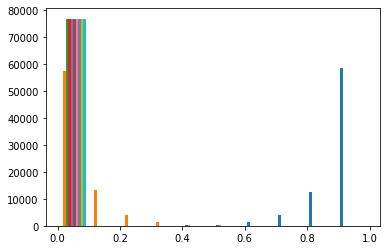

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_data_set_1, df_target_set_1)

train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 10,
    'verbose': 2,
}

gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    verbose_eval=5,
)

preds = gbm.predict(X_test)
y_pred = []
 
for x in preds:
    y_pred.append(np.argmax(x))

print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

import matplotlib.pyplot as plt

# ヒストグラムを出力
plt.hist(preds)

[0.299893   0.04408522 0.12181967 ... 0.02269333 0.23103303 0.04771526]
0.7480542554684061


([array([0.0000e+00, 0.0000e+00, 2.0000e+00, 1.2000e+01, 1.1500e+02,
         4.4200e+02, 1.3000e+03, 3.9180e+03, 1.2612e+04, 5.8477e+04]),
  array([5.7467e+04, 1.3369e+04, 4.0850e+03, 1.3580e+03, 4.5600e+02,
         1.2700e+02, 1.3000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([76878.,    

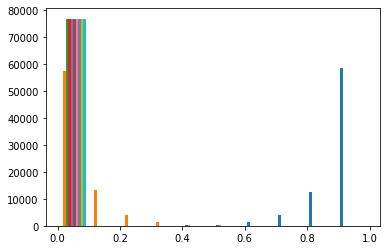

In [67]:
# モデルの改善（LGBMRegressor）
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train,)
y_pred = gbm.predict(X_test)
print(y_pred)
print(roc_auc_score(y_test, y_pred))
plt.hist(preds)


(array([2.0517e+04, 2.3773e+04, 1.2299e+04, 7.0530e+03, 4.5920e+03,
        2.8400e+03, 1.8340e+03, 1.2070e+03, 8.1500e+02, 5.6500e+02,
        4.1600e+02, 2.8600e+02, 1.5600e+02, 1.3900e+02, 1.0000e+02,
        5.6000e+01, 4.6000e+01, 1.6000e+01, 1.0000e+01, 1.0000e+01,
        9.0000e+00, 5.0000e+00, 5.0000e+00, 4.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

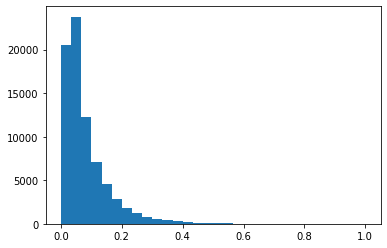

In [111]:
plt.hist(y_pred, bins=30 ,range=(0, 1))

In [64]:
# 汎化性能の改善
param_grid = {"max_depth": [5, 8, 15],"min_data_in_leaf": [3, 9, 18],"num_leaves": [31, 45, 60],}

grid_search = GridSearchCV(gbm, param_grid, cv=skf)

X_train, X_test, y_train, y_test = train_test_split(df_data_set_1, df_target_set_1, random_state=0)

grid_search.fit(X_train, y_train)
#訓練データにfitメソッドを用いるだけでパラメーターの組み合わせに対して交差検証が実行されru
 
 
print("Test set score:{:.2f}".format(grid_search.score(X_test, y_test)))

display(display(pd.DataFrame(grid_search.cv_results_)))

Test set score:0.07


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_data_in_leaf,param_num_leaves,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.138529,0.164815,0.072518,0.007731,5,3,31,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075917,0.073572,...,0.079245,0.073375,0.066380,0.072390,0.075343,0.087273,0.080923,0.076443,0.005429,18
1,1.085122,0.069468,0.074053,0.003342,5,3,45,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075986,0.073450,...,0.078312,0.074919,0.065304,0.072348,0.075623,0.087982,0.080575,0.076459,0.005657,16
2,1.066143,0.019255,0.072248,0.003917,5,3,60,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075986,0.073450,...,0.078312,0.074919,0.065304,0.072348,0.075623,0.087982,0.080575,0.076459,0.005657,16
3,1.078337,0.076298,0.077613,0.011189,5,9,31,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.075693,0.073308,...,0.079247,0.073901,0.066106,0.072305,0.076054,0.088362,0.079647,0.076465,0.005604,15
4,1.027037,0.007840,0.066868,0.001191,5,9,45,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.074601,0.073781,...,0.078709,0.075381,0.066023,0.072087,0.076193,0.087452,0.080214,0.076519,0.005461,11
5,1.027803,0.013516,0.067862,0.001151,5,9,60,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.074601,0.073781,...,0.078709,0.075381,0.066023,0.072087,0.076193,0.087452,0.080214,0.076519,0.005461,11
6,1.024552,0.025139,0.066253,0.000994,5,18,31,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075163,0.074088,...,0.079120,0.075095,0.066290,0.072640,0.076680,0.088054,0.081117,0.076746,0.005452,6
7,1.023947,0.008853,0.071412,0.012385,5,18,45,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075192,0.074115,...,0.079154,0.075749,0.066157,0.072160,0.076008,0.087375,0.079893,0.076551,0.005302,9
8,1.074304,0.082752,0.067879,0.003704,5,18,60,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075192,0.074115,...,0.079154,0.075749,0.066157,0.072160,0.076008,0.087375,0.079893,0.076551,0.005302,9
9,1.072743,0.060754,0.063429,0.004138,8,3,31,"{'max_depth': 8, 'min_data_in_leaf': 3, 'num_l...",0.075165,0.075039,...,0.078663,0.075226,0.065904,0.070413,0.075214,0.088906,0.080073,0.076511,0.005864,13


None

In [66]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_data_in_leaf,param_num_leaves,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.138529,0.164815,0.072518,0.007731,5,3,31,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075917,0.073572,...,0.079245,0.073375,0.066380,0.072390,0.075343,0.087273,0.080923,0.076443,0.005429,18
1,1.085122,0.069468,0.074053,0.003342,5,3,45,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075986,0.073450,...,0.078312,0.074919,0.065304,0.072348,0.075623,0.087982,0.080575,0.076459,0.005657,16
2,1.066143,0.019255,0.072248,0.003917,5,3,60,"{'max_depth': 5, 'min_data_in_leaf': 3, 'num_l...",0.075986,0.073450,...,0.078312,0.074919,0.065304,0.072348,0.075623,0.087982,0.080575,0.076459,0.005657,16
3,1.078337,0.076298,0.077613,0.011189,5,9,31,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.075693,0.073308,...,0.079247,0.073901,0.066106,0.072305,0.076054,0.088362,0.079647,0.076465,0.005604,15
4,1.027037,0.007840,0.066868,0.001191,5,9,45,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.074601,0.073781,...,0.078709,0.075381,0.066023,0.072087,0.076193,0.087452,0.080214,0.076519,0.005461,11
5,1.027803,0.013516,0.067862,0.001151,5,9,60,"{'max_depth': 5, 'min_data_in_leaf': 9, 'num_l...",0.074601,0.073781,...,0.078709,0.075381,0.066023,0.072087,0.076193,0.087452,0.080214,0.076519,0.005461,11
6,1.024552,0.025139,0.066253,0.000994,5,18,31,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075163,0.074088,...,0.079120,0.075095,0.066290,0.072640,0.076680,0.088054,0.081117,0.076746,0.005452,6
7,1.023947,0.008853,0.071412,0.012385,5,18,45,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075192,0.074115,...,0.079154,0.075749,0.066157,0.072160,0.076008,0.087375,0.079893,0.076551,0.005302,9
8,1.074304,0.082752,0.067879,0.003704,5,18,60,"{'max_depth': 5, 'min_data_in_leaf': 18, 'num_...",0.075192,0.074115,...,0.079154,0.075749,0.066157,0.072160,0.076008,0.087375,0.079893,0.076551,0.005302,9
9,1.072743,0.060754,0.063429,0.004138,8,3,31,"{'max_depth': 8, 'min_data_in_leaf': 3, 'num_l...",0.075165,0.075039,...,0.078663,0.075226,0.065904,0.070413,0.075214,0.088906,0.080073,0.076511,0.005864,13


# 【問題5】最終的なモデルの選定

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


[0.04398899 0.06188644 0.01708495 ... 0.04385322 0.0859882  0.18789949]
       SK_ID_CURR    TARGET
0          100001  0.043989
1          100005  0.061886
2          100013  0.017085
3          100028  0.043432
4          100038  0.106328
...           ...       ...
48739      456221  0.033379
48740      456222  0.071549
48741      456223  0.043853
48742      456224  0.085988
48743      456250  0.187899

[48744 rows x 2 columns]


,SK_ID_CURR,TARGET
4515,132289,0.112493
4516,132290,-0.003117
4517,132300,0.161135
4518,132319,0.123105
4519,132340,0.004098
4520,132344,0.140246
4521,132345,0.000005
4522,132346,0.207640
4523,132352,0.096783
4524,132353,0.042763


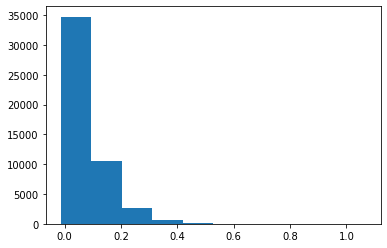

In [104]:
df_test = pd.read_csv('/Users/suzukiyuuta/Downloads/application_test.csv') # テストデータ
df_X_test = df_test.loc[:,["EXT_SOURCE_1","EXT_SOURCE_3",\
                  "EXT_SOURCE_2","DAYS_EMPLOYED","AMT_CREDIT",\
                  "DAYS_BIRTH","AMT_ANNUITY","AMT_GOODS_PRICE",\
                  "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CAHANGE",\
                  "DAYS_REGISTRATION","OWN_CAR_AGE","REGION_POPULATION_RELATIVE"]]

df_X_ID = df_test.loc[:,['SK_ID_CURR']] 

gbm1 = lgb.LGBMRegressor(max_depth = 5,min_data_in_leaf = 18,num_leaves = 45)
gbm1.fit(df_data_set, df_target_set)
y_pred_submission = gbm.predict(df_X_test)
print(y_pred_submission)
df_target = pd.DataFrame(y_pred_submission ,columns = ['TARGET'])
df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET'] < 0, 'TARGET'] = 0
df_submission.to_csv("suzuki0205.csv",index=False)

plt.hist(y_pred_submission)
print(df_submission)

df_submission[530:543]
df_submission[4515:4528]
#kaggleようデータ作成
# df_submission = pd.concat([df_X_ID, df_target], axis=1,)
# df_submission.loc[df['TARGET']] = 0
# y_pred.to_csv("suzuki0205.csv",index=False)